In [ ]:
import keras
from keras import layers
from keras import regularizers
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate, Lambda, GaussianNoise, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Normalization
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [ ]:
train=pd.read_csv('../input/keras-denoiser/1X.csv') # train file already encoded for categories
train.head(2)

In [ ]:
X = train.values


In [ ]:
input_data = keras.Input(shape=(30,))

encoded = GaussianNoise(0.01)(input_data)
encoded = layers.Dense(60, activation='relu')(encoded)
encoded = layers.Dense(30, activation='relu')(encoded)
encoded = layers.Dropout(0.3)(encoded)
encoded = layers.Dense(15, activation='relu')(encoded)

decoded = layers.Dense(15, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = layers.Dense(30, activation='relu')(decoded)
decoded = layers.Dense(30, activation='sigmoid')(decoded)


<h4> AUTOCODER MODEL : https://blog.keras.io/building-autoencoders-in-keras.html<h4>

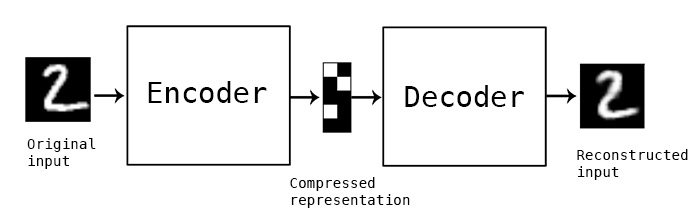

In [ ]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_data, decoded)
autoencoder.summary()

<h4> TRAINING :<h4>

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.00001)

autoencoder.compile(optimizer=optimizer, 
                    loss='binary_crossentropy',
                    )


In [ ]:
autoencoder.fit(X, X,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_split=0.2,
                callbacks=[EarlyStopping('val_loss',patience=3)])

In [ ]:
train_denoised = autoencoder.predict(train)

In [ ]:
test_denoised = autoencoder.predict(test)

In [ ]:
train_denoised=pd.DataFrame(train_denoised)
test_denoised=pd.DataFrame(test_denoised)

In [ ]:
train_denoised.to_csv('train_denoised.csv',index=False)
test_denoised.to_csv('test_denoised.csv',index=False)